# Factors Affecting World Population

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Question - 1 
#### How did China’s population grow before and after the start of industrialization in 1978?


Index(['Sr.No', 'Country', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022'],
      dtype='object')


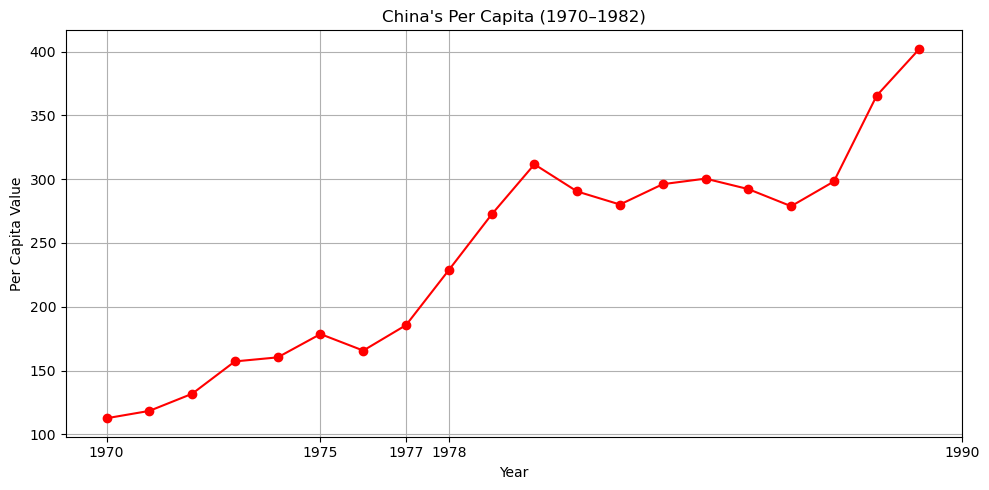

In [ ]:
indus = pd.read_csv("Per Capita GDP of All Countries 1970 to 2022.csv")
print(indus.columns)

# Filter only China
china_data = indus[indus['Country'] == 'China']

# Extract years 1970 to 1990
years = [str(y) for y in range(1970, 1990)]
values = china_data[years].values.flatten()

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(years, values, marker='o', color='red')
plt.title("China's Per Capita (1970-1982)")
plt.xlabel("Year")
plt.xticks(["1970","1975","1977","1978","1990"])
plt.ylabel("Per Capita Value")
plt.grid(True)
plt.tight_layout()
plt.show()


### What the Visualization Shows

1. **Steady Growth Pre-1978:** From 1970 to 1978, China's per capita GDP increased gradually, reflecting a slow-paced economic environment before industrial reforms.

2. **Sharp Rise Post-1978:** After industrialization began in 1978, there's a noticeable surge in per capita GDP, marking the early impact of economic liberalization.

3. **Acceleration Toward Late '80s:** The spike from the mid-1980s to 1989 highlights China's rapid economic growth, signaling improved productivity and a shift in population dynamics.


      Population
1960     667.070
1965     715.185
1970     818.315
1975     916.395
1978     956.165
1990    1135.185
2000    1262.645
2010    1337.705
2020    1411.100


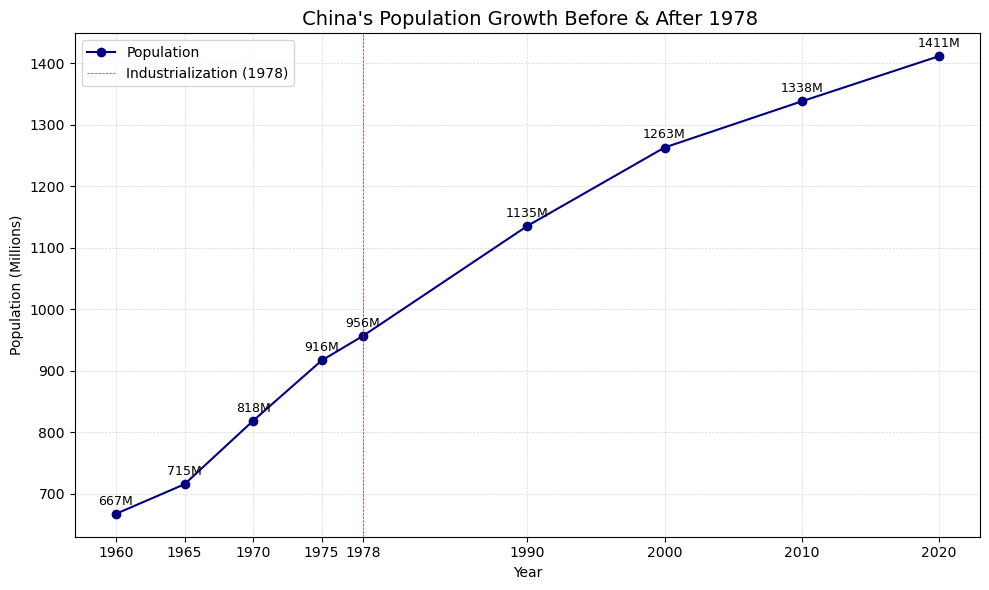

In [3]:
df = pd.read_csv("world_population_worldbank.csv")
# Filter China
china_df = df[df['Country Name'] == 'China']

# Include more years to see the trend
years = ['1960','1965', '1970', '1975','1978', '1990', '2000','2010','2020']
china_selected = china_df[years].T
china_selected.columns = ['Population']

# Convert index to int and scale to millions
china_selected.index = china_selected.index.astype(int)
china_selected['Population'] = china_selected['Population'] / 1000000
print(china_selected)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(china_selected.index, china_selected['Population'], marker='o', linestyle='-', color='navy', label='Population')

for year, pop in zip(china_selected.index, china_selected['Population']):
    plt.text(year, pop + 15, f"{pop:.0f}M", ha='center', fontsize=9)

plt.axvline(x=1978, color='crimson', linestyle='--', linewidth=0.5, label='Industrialization (1978)')
plt.title(" China's Population Growth Before & After 1978", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Population (Millions)")
plt.legend()
plt.grid(True, alpha=0.5, linestyle="--",linewidth=0.5)
plt.xticks(china_selected.index)
plt.tight_layout()
plt.show()


### What the Visualization Shows

1. **Moderate Growth Pre-1978:** Between 1960 and 1978, China's population increased by about 289 million—showing steady but moderate growth.

2. **Clear Acceleration Post-1978:** After industrialization began in 1978, the population surged by over 450 million by 2020, indicating a sharper growth rate in the following decades.

3. **Growth increased by Industrialization:** The spike reflects how industrialization boosted healthcare, infrastructure, and living conditions—leading to higher population growth before eventually slowing due to policy interventions.


## Question - 2
#### How did industrialization impact population growth differently in South Korea and Bangladesh after 1960?


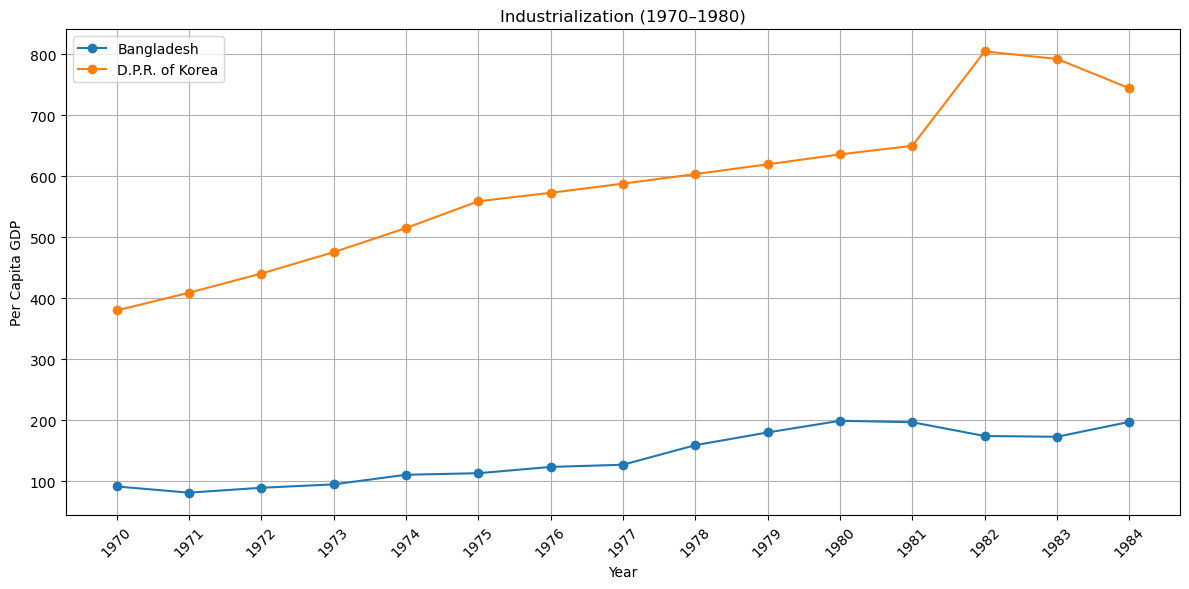

In [ ]:
indus = pd.read_csv("Per Capita GDP of All Countries 1970 to 2022.csv")

years = [str(y) for y in range(1970, 1985)]

# Filter the 3 countries
countries = [ 'Bangladesh', 'D.P.R. of Korea']
filtered = indus[indus['Country'].isin(countries)]

# Plot the data
plt.figure(figsize=(12, 6))

for country in countries:
    values = filtered[filtered['Country'] == country][years].values.flatten()
    plt.plot(years, values, marker='o', label=country)

plt.title("Industrialization (1970-1984)")
plt.xlabel("Year")
plt.ylabel("Per Capita GDP")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### What the Visualization Shows

1. **Diverging Economic Trajectories:** Between 1970–1984, South Korea (D.P.R. of Korea in this plot) showed a steep and consistent rise in per capita GDP, indicating successful industrialization, while Bangladesh’s growth remained relatively flat and slow.

2. **Industrialization Payoff:** South Korea’s sharp climb post-1975 reflects high industrial output, better jobs, and economic stability—all factors that typically correlate with slower, more controlled population growth.

3. **Delayed Impact in Bangladesh:** Bangladesh's gradual GDP growth suggests late or slower industrial development, often linked with higher fertility rates and faster population growth due to lower economic security.


/tmp/ipykernel_7679/1758590871.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Value'] = pd.to_numeric(filtered['Value'], errors='coerce')


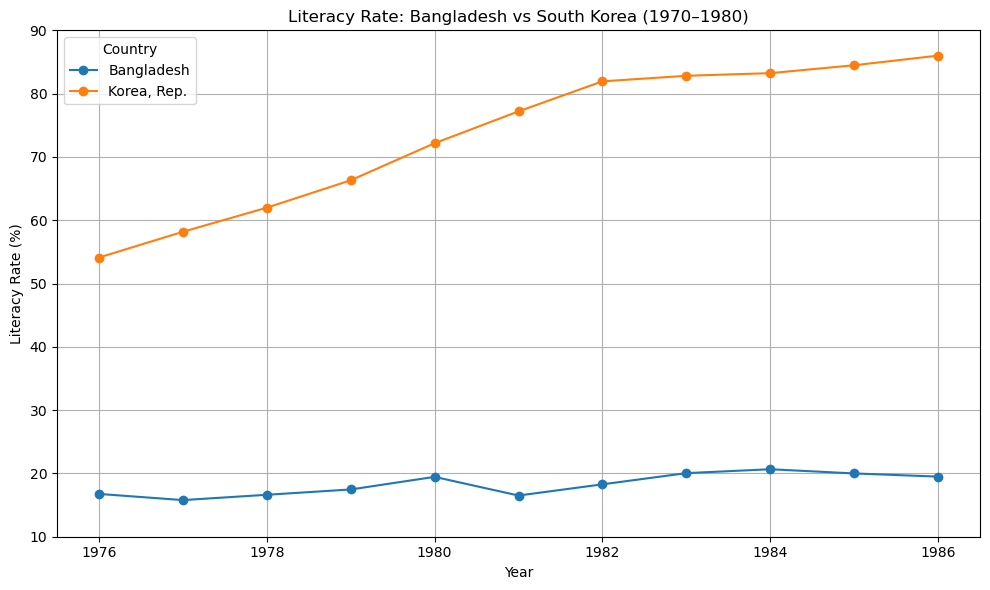

In [5]:
literacy = pd.read_csv("School enrollment, secondary (% gross).csv")


# Filter Bangladesh & South Korea, 1970–1980
filtered = literacy[
    (literacy['Country Name'].isin(['Bangladesh', 'Korea, Rep.'])) &
    (literacy['Year'].between(1976, 1986))
]

# Convert values to numerics
filtered['Value'] = pd.to_numeric(filtered['Value'], errors='coerce')

# Group the data to remove duplicates
grouped = filtered.groupby(['Year', 'Country Name'])['Value'].mean().reset_index()
pivoted = grouped.pivot(index='Year', columns='Country Name', values='Value')

# Plot the data
pivoted_interp = pivoted.interpolate(method='linear')
pivoted_interp.plot(marker='o',linestyle=None, figsize=(10, 6))
plt.title("Literacy Rate: Bangladesh vs South Korea (1970–1980)")
plt.xlabel("Year")
plt.ylabel("Literacy Rate (%)")
plt.yticks([10,20,30,40,50,60,70,80,90])
plt.grid(True)
plt.legend(title="Country")
plt.tight_layout()
plt.show()



### What the Visualization Shows

1. **Sharp Rise in South Korea:** South Korea’s literacy rate shot up from ~54% to ~86% between 1976 and 1986, reflecting major education reforms aligned with its industrial growth.

2. **Stagnant Growth in Bangladesh:** Bangladesh’s literacy rate remained largely flat, hovering between 16% and 21%, showing minimal progress in educational development during this period.

3. **Industrialization-Education Link:** The clear contrast suggests that South Korea's industrialization strongly prioritized human capital, while Bangladesh lagged in educational access—affecting long-term population and economic outcomes.


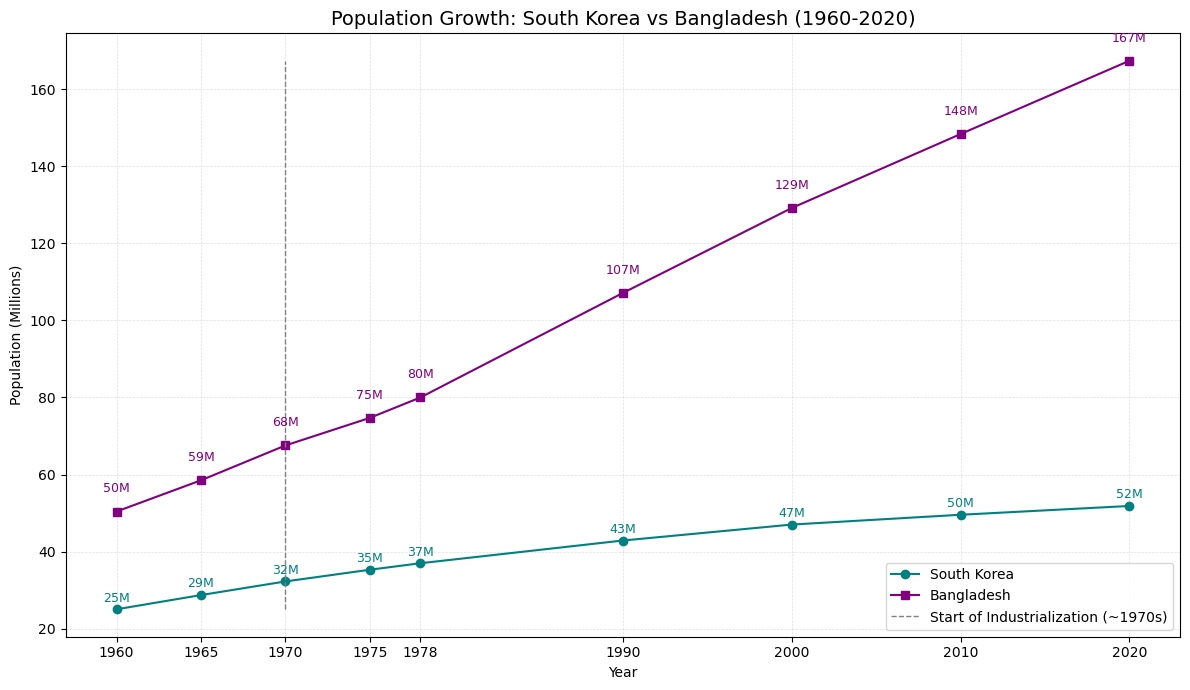

In [6]:
# Filter South Korea and Bangladesh
skorea_df = df[df['Country Name'] == 'Korea, Rep.']
bangladesh_df = df[df['Country Name'] == 'Bangladesh']

years = ['1960', '1965', '1970', '1975', '1978', '1990', '2000', '2010', '2020']

# Get South Korea data
skorea_selected = skorea_df[years].T
skorea_selected.columns = ['South Korea']
skorea_selected.index = skorea_selected.index.astype(int)
skorea_selected['South Korea'] = skorea_selected['South Korea'] / 1_000_000  # to millions

# Get Bangladesh data
bangladesh_selected = bangladesh_df[years].T
bangladesh_selected.columns = ['Bangladesh']
bangladesh_selected.index = bangladesh_selected.index.astype(int)
bangladesh_selected['Bangladesh'] = bangladesh_selected['Bangladesh'] / 1_000_000  # to millions

combined = pd.concat([skorea_selected, bangladesh_selected], axis=1)

# Plot the data
plt.figure(figsize=(12, 7))
plt.plot(combined.index, combined['South Korea'], marker='o', label='South Korea', color='teal')
plt.plot(combined.index, combined['Bangladesh'], marker='s', label='Bangladesh', color='purple')

for year in combined.index:
    plt.text(year, combined['South Korea'][year] + 2, f"{combined['South Korea'][year]:.0f}M", ha='center', fontsize=9, color='teal')
    plt.text(year, combined['Bangladesh'][year] + 5, f"{combined['Bangladesh'][year]:.0f}M", ha='center', fontsize=9, color='purple')

plt.plot([1970, 1970], [combined.min().min(), combined.max().max()], color='gray', linestyle='--', linewidth=1, label='Start of Industrialization (~1970s)')
plt.title("Population Growth: South Korea vs Bangladesh (1960-2020)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Population (Millions)")
plt.grid(True, alpha=0.4, linestyle="--", linewidth=0.5)
plt.legend()
plt.xticks(combined.index)
plt.tight_layout()
plt.show()


### What the Visualization Shows

1. **Bangladesh's Rapid Population Growth:** Bangladesh’s population more than tripled from 50M in 1960 to 167M in 2020. Industrialization brought jobs but lacked parallel investments in female education—so the birth rate dropped slowly.

2. **South Korea’s Controlled Growth:** South Korea grew from 25M to 52M. Early industrialization boosted female literacy and workforce participation, leading to a steep decline in birth rates and a stable population trend.

3. **The Role of Industrialization & Women’s Empowerment:** Both countries industrialized around the 1970s, but outcomes diverged. South Korea's human development focus curbed population growth; Bangladesh’s labor-driven model didn’t reduce fertility as effectively.


## Question - 3
#### Do similar land areas mean similar populations? Comparison between Saudi Arabia and Mexico


110    126.014024
151     34.268528
Name: Population, dtype: float64


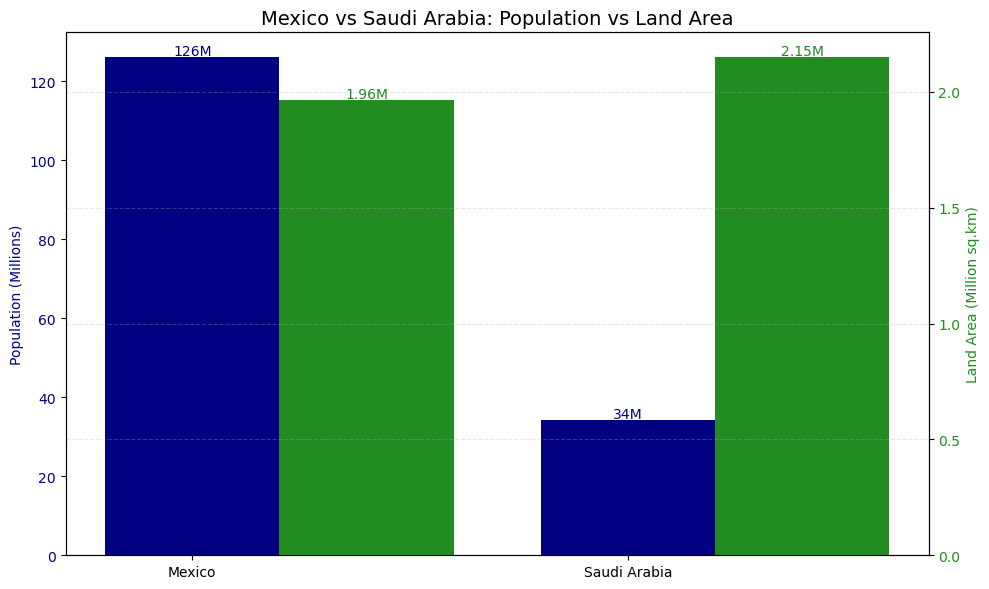

In [7]:
land_df = pd.read_csv("world-data-2023.csv")
# Filter for Mexico and Saudi Arabia
countries = ['Mexico', 'Saudi Arabia']
filtered_df = land_df[land_df['Country'].isin(countries)]

# Select relevant columns
plot_df = filtered_df[['Country', 'Population', 'Land Area(Km2)']].copy()

# Convert to numeric
plot_df['Population'] = plot_df['Population'].str.replace(',', '').astype(float)
plot_df['Land Area(Km2)'] = plot_df['Land Area(Km2)'].str.replace(',', '').astype(float)

# Convert to millions
plot_df['Population'] = plot_df['Population'] / 1_000_000
plot_df['Land Area(Km2)'] = plot_df['Land Area(Km2)'] / 1_000_000

# Set x-axis
x = plot_df['Country']
x_axis = range(len(x))

fig, ax1 = plt.subplots(figsize=(10, 6))

# Left Y-axis: Population
ax1.bar(x_axis, plot_df['Population'], width=0.4, color='navy', align='center', label='Population (Millions)')
ax1.set_ylabel('Population (Millions)', color='navy')
ax1.tick_params(axis='y', labelcolor='navy')

print(plot_df["Population"])

# Annotate population bars
for i, val in enumerate(plot_df['Population']):
    ax1.text(i, val + 0.5, f"{val:.0f}M", ha='center', color='navy', fontsize=10)

# Right Y-axis: Land Area
ax2 = ax1.twinx()
ax2.bar([i + 0.4 for i in x_axis], plot_df['Land Area(Km2)'], width=0.4, color='forestgreen', align='center', label='Land Area (Million sq.km)')
ax2.set_ylabel('Land Area (Million sq.km)', color='forestgreen')
ax2.tick_params(axis='y', labelcolor='forestgreen')

# Annotate land area bars
for i, val in enumerate(plot_df['Land Area(Km2)']):
    ax2.text(i + 0.4, val+0.01, f"{val:.2f}M", ha='center', color='forestgreen', fontsize=10)

plt.xticks(x_axis, x)
plt.title("Mexico vs Saudi Arabia: Population vs Land Area", fontsize=14)
fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


The bar chart compares the **population** and **land area** of Mexico and Saudi Arabia.

#### Key Observations:

- **Population Disparity**:  
  Mexico has a **population of 126M**, nearly **4 times** that of Saudi Arabia (**34M**), despite both having similar land areas.

- **Land Area**:  
  Saudi Arabia has a **slightly larger land area** (2.15M sq.km) than Mexico (1.96M sq.km), yet supports far fewer people.

- **Population Density**:  
  Mexico's significantly **higher population density** suggests more habitable or agriculturally viable land, likely due to favorable geography and climate.

- **Inference**:  
  The mismatch highlights how land size doesn’t equate to population size — **geography, climate, urbanization, and infrastructure** play a crucial role in shaping population distribution.


## Question - 4
#### How much do India and China contribute to Asia’s total population?


/tmp/ipykernel_7679/3104637139.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asia_df[year] = asia_df[year].astype(str).str.replace(',', '').astype(float)
/tmp/ipykernel_7679/3104637139.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asia_df[year] = asia_df[year].astype(str).str.replace(',', '').astype(float)
/tmp/ipykernel_7679/3104637139.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

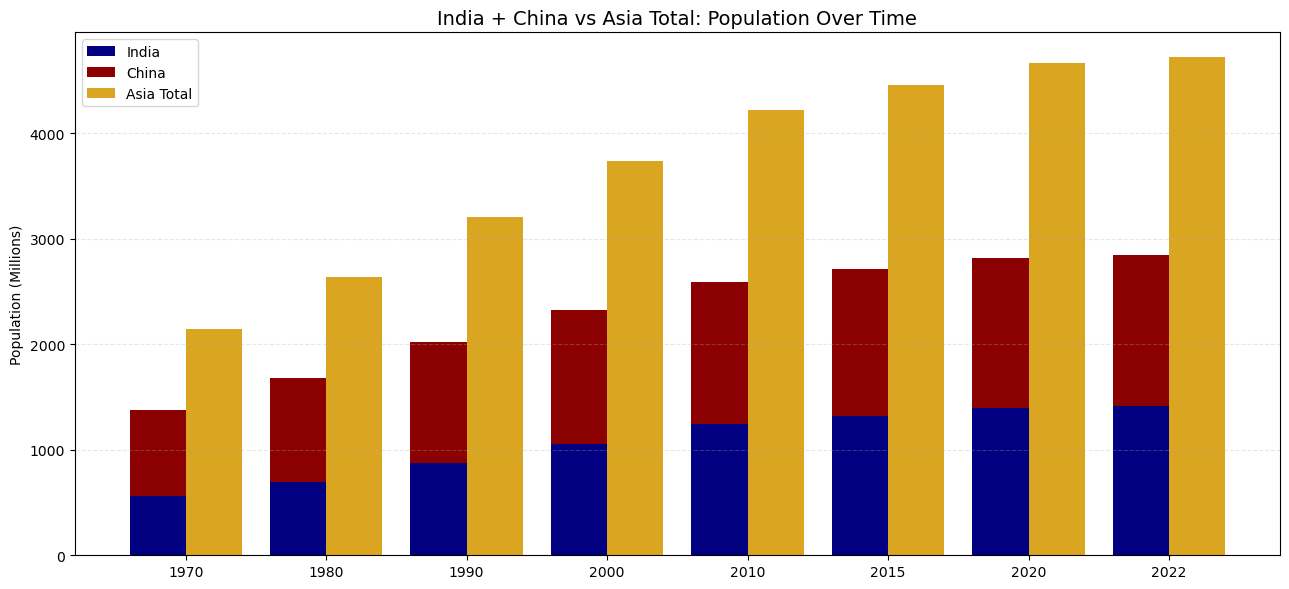

In [ ]:
df = pd.read_csv("world_population_withContinent.csv")

# Filter for Asia only
asia_df = df[df['Continent'] == 'Asia']

# Years to analyze
years = ['1970 Population', '1980 Population', '1990 Population', '2000 Population',
         '2010 Population', '2015 Population', '2020 Population', '2022 Population']

for year in years:
    asia_df[year] = asia_df[year].astype(str).str.replace(',', '').astype(float)

india_pop = asia_df[asia_df['Country/Territory'] == 'India'].iloc[0][years]
china_pop = asia_df[asia_df['Country/Territory'] == 'China'].iloc[0][years]
asia_total = asia_df[years].sum()

# Convert index to years
years_clean = [int(y.split()[0]) for y in years]
x = range(len(years_clean))
bar_width = 0.4

# Plot the data
plt.figure(figsize=(13, 6))

plt.bar([i - bar_width/2 for i in x], india_pop.values / 1_000_000, width=bar_width,
        label='India', color='navy')
plt.bar([i - bar_width/2 for i in x], china_pop.values / 1_000_000, width=bar_width,
        bottom=india_pop.values / 1_000_000, label='China', color='darkred')
        
plt.bar([i + bar_width/2 for i in x], asia_total.values / 1_000_000, width=bar_width,
        label='Asia Total', color='goldenrod')

plt.xticks(x, years_clean)
plt.ylabel("Population (Millions)")
plt.title("India + China vs Asia Total: Population Over Time", fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


This stacked bar chart compares the combined population of **India and China** with the **total population of Asia** from **1970 to 2022**.

#### Key Observations:

- **Dominance of India & China**:
  Throughout the decades, **India and China together make up more than half of Asia’s population**.

- **Consistent Growth**:
  All three — India, China, and Asia — show a steady population rise.  
  Notably, **India's population rises faster** than China’s after 2000.

- **Gap Analysis**:
  The **difference between Asia’s total and India+China** reflects the population of **other Asian countries**, which grows slower in comparison.

- **Recent Years**:
  By 2022, India and China’s share remains dominant, though the **rate of increase flattens**, suggesting slowing growth.

#### Inference:
Asia’s population trend is **heavily influenced by India and China**, both in volume and growth patterns. Policymakers across Asia must account for this demographic concentration while planning for sustainable development.


## Question - 5
#### How does the level of development impact population growth? A comparison between India and Nigeria


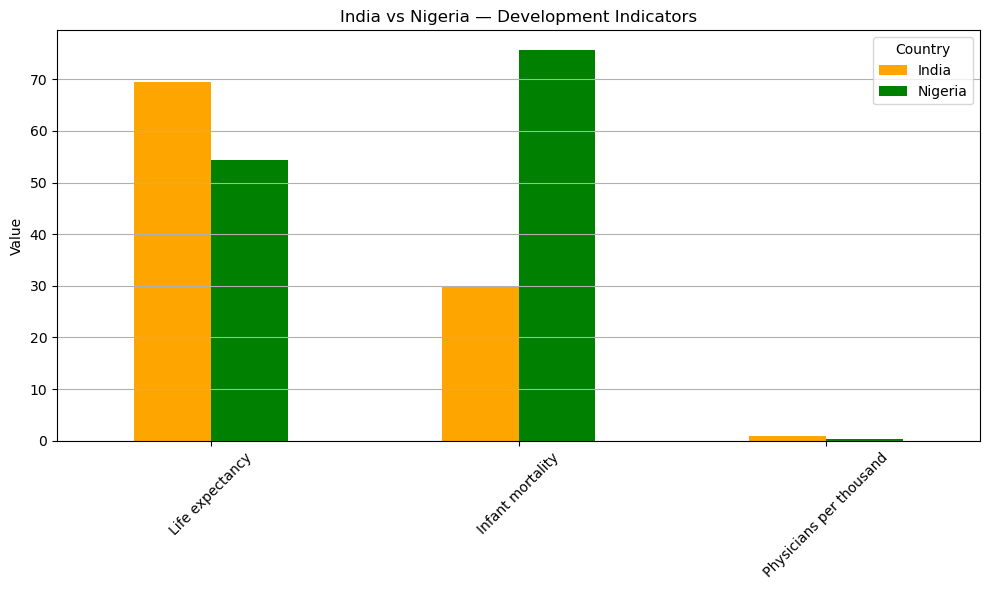

In [9]:
df = pd.read_csv("world-data-2023.csv")  
df.columns = df.columns.str.strip()   
df['Country'] = df['Country'].str.strip()

# Filter India and Nigeria
countries = df[df['Country'].isin(['India', 'Nigeria'])].set_index('Country')

# Choose development indicators
indicators = [
    'Life expectancy',
    'Infant mortality',
    'Physicians per thousand'
]

# Convert to numeric
for col in indicators:
    countries[col] = countries[col].astype(str).str.replace(",", "").str.strip()
    countries[col] = pd.to_numeric(countries[col], errors='coerce')

# Transpose for plotting
plot_data = countries[indicators].T

# Plot the data
plot_data.plot(kind='bar', figsize=(10, 6), color=['orange', 'green'])
plt.title("India vs Nigeria — Development Indicators")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title="Country")
plt.tight_layout()
plt.show()


This bar chart visualizes key development metrics — **life expectancy**, **infant mortality**, and **physicians per thousand people** — to compare **India and Nigeria** in 2023.

#### Observations:

- **Life Expectancy**:  
  India leads with **69 years**, while Nigeria lags behind at **54 years** — highlighting better healthcare outcomes in India.

- **Infant Mortality**:  
  Nigeria has a higher rate (**76 deaths per 1,000 births**) compared to India’s **30**, indicating weaker maternal and child healthcare infrastructure.

- **Physicians per Thousand**:  
  India stands at **3**, triple Nigeria’s **1**, reflecting greater medical accessibility and training capacity.

#### Inference:
Despite both being developing nations, **India shows significantly better healthcare and development metrics** than Nigeria, suggesting a more advanced stage of socio-economic progress.


<>:22: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_7679/789550582.py:22: SyntaxWarning: invalid escape sequence '\d'
  melted['Year'] = melted['Year'].str.extract('(\d{4})').astype(int)


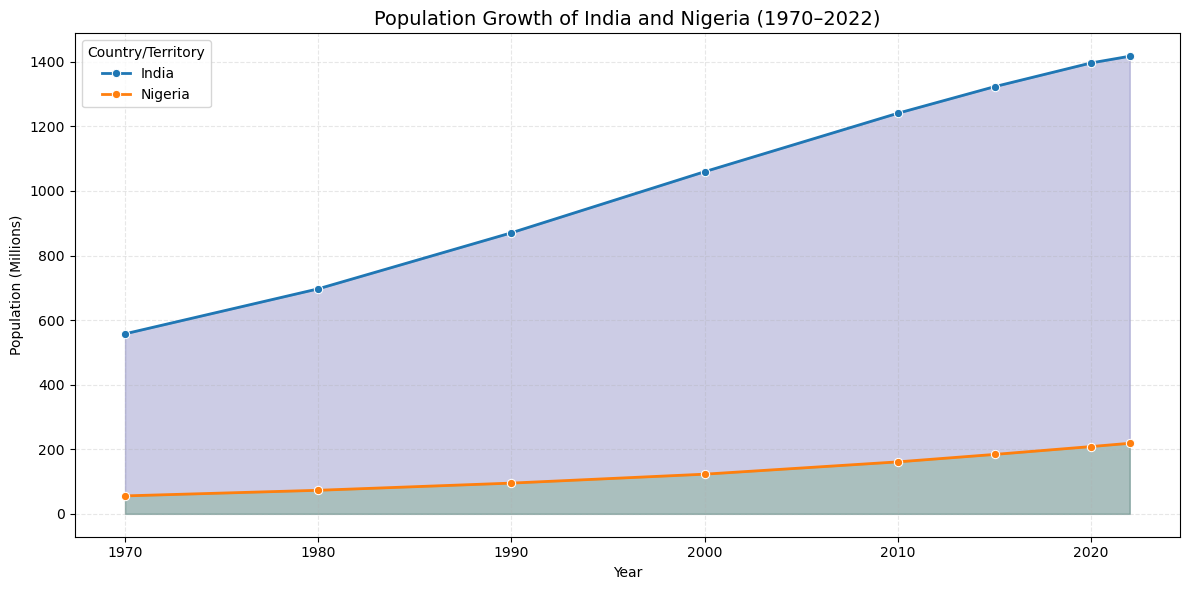

In [10]:
import seaborn as sns
df = pd.read_csv("world_population_withContinent.csv")

# Choose countries and years
countries = ['India', 'Nigeria']
years = ['1970 Population', '1980 Population', '1990 Population', '2000 Population',
         '2010 Population', '2015 Population', '2020 Population', '2022 Population']

# Convert to numeric
for year in years:
    df[year] = df[year].astype(str).str.replace(',', '').astype(float)

# Filter countries
selected_df = df[df['Country/Territory'].isin(countries)]

melted = selected_df.melt(id_vars='Country/Territory',
                          value_vars=years,
                          var_name='Year',
                          value_name='Population')

# Clean year and convert population
melted['Year'] = melted['Year'].str.extract('(\d{4})').astype(int)
melted['Population'] = melted['Population'] / 1_000_000  # millions

# Plot the data
plt.figure(figsize=(12, 6))

sns.lineplot(data=melted, x='Year', y='Population', hue='Country/Territory', linewidth=2, marker='o')
for country, color in zip(countries, ['navy', 'forestgreen']):
    sub = melted[melted['Country/Territory'] == country]
    plt.fill_between(sub['Year'], sub['Population'], alpha=0.2, color=color)

plt.title("Population Growth of India and Nigeria (1970–2022)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Population (Millions)")
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

This line chart compares the **population trends of India and Nigeria** over five decades, highlighting differences in scale and growth patterns.

#### Key Insights:

- **India** shows a massive and consistent growth, going from ~550M in 1970 to over **1.4B in 2022**.
- **Nigeria** starts much smaller at around 55M but shows a **steeper relative growth**, crossing **200M by 2022**.
- The **growth rate of Nigeria accelerates** after 2000, indicating a sharp rise in birth rate and declining mortality.
- India’s growth is linear and massive, while Nigeria’s curve is more exponential in nature.


### Final Inference for Question 5:

- **India’s population** is large, but its relatively higher development (better healthcare, more doctors, higher life expectancy) has helped **slow down the growth rate** over time.

- **Nigeria**, on the other hand, has **lower development indicators** — and this is reflected in its **rapid, uncontrolled population growth**, driven by higher birth rates and limited access to family planning.

- **Inference:** Higher development leads to better education, healthcare, and awareness — which directly **slows population growth**. India is a clear example of this. Nigeria’s case shows how low development keeps population growth high and unchecked.

